# <center> Image Classification </center>

### About the project:

**Our task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

__The Data:__ first of all let us download the dataset.

In [41]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using matplotlib to view an image from the data set. It can be any image from the data set.

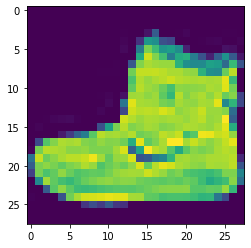

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# graping 1 image from the dataset and display it
plt.imshow(x_train[0])

We can clearly see the image item is an actual boot

### Preprocessing the Data

Normalize the X train and X test data by dividing by the max value of the image arrays.

In [43]:
# first let us check the maximum value
x_train.max()

255

In [44]:
# deviding x_traing by maximum value
x_train = x_train/255

# deviding x_test by maximum value
x_test = x_test/255

Next we will reshape the X arrays to include a 4 dimension of the single channel.

In [45]:
# checking the original shape
x_train.shape

(60000, 28, 28)

In [46]:
# reshapeing x_train and x_test
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

Next we will convert the y_train and y_test values to categorical.

In [47]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

### Building the Model

These are the specifications of our model:
* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons)

* Final Dense Layer of 10 Neurons with a softmax activation

* We will compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']

In [48]:
# imporint the library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
# checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
Fit the model to the x_train set. With epochs=3

In [50]:
model.fit(x_train,y_cat_train, validation_data=(x_test,y_cat_test),epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 33s 552us/sample - loss: 0.4037 - accuracy: 0.8561 - val_loss: 0.3635 - val_accuracy: 0.8682
Epoch 2/3
60000/60000 [==============================] - 37s 623us/sample - loss: 0.2770 - accuracy: 0.9013 - val_loss: 0.2914 - val_accuracy: 0.8953
Epoch 3/3
60000/60000 [==============================] - 32s 538us/sample - loss: 0.2388 - accuracy: 0.9148 - val_loss: 0.2773 - val_accuracy: 0.9012


### Evaluating the Model

Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.

In [51]:
# checking the model metrics
model.metrics_names

['loss', 'accuracy']

In [52]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.403731,0.856133,0.363461,0.8682
1,0.276970,0.901250,0.291432,0.8953
2,0.238801,0.914833,0.277283,0.9012


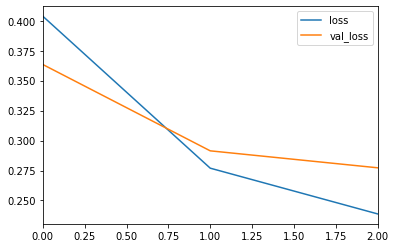

In [53]:
# plotting the loss vs val_loss metrics
metrics[['loss', 'val_loss']].plot()

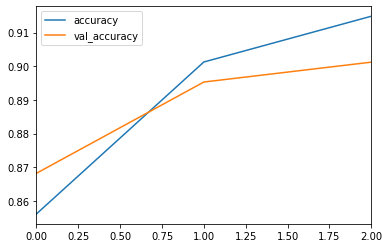

In [54]:
metrics[['accuracy', 'val_accuracy']].plot()

In [56]:
# importing classificaotin_report from sklearn
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)
y_cat_test.shape

(10000, 10)

In [57]:
# printing out our classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.85      0.84      1000
           3       0.91      0.90      0.90      1000
           4       0.77      0.92      0.84      1000
           5       0.97      0.98      0.97      1000
           6       0.78      0.68      0.72      1000
           7       0.97      0.94      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



With only 3 epochs we have got 90% accuracy. We can defenitly improve the model but for now we will stop here.

# <center> End </center>